# Project 7

## Communicate Data Findings
<b> In this Project i am going to choose the dataset <a href='https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv&sa=D&ust=1554486256021000'> Loan Data from Prosper</a>, and then perform Exploratory and Explanotory Data Analysis. I am also going to write down the steps on how i did the project</b>

## Lets import the libraries 😊

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

## Now lets read the downloaded dataset into a pandas dataframe 🗄️

In [2]:
loan=pd.read_csv('prosperLoanData.csv')

## Now, lets go ahead and access our data, visually and programatically 💻 
<b style=color:green> 1. Lets take a random sample of 5 to see the structure of the Data </b> 

In [3]:
loan.sample(5)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
104152,0F0D3558999088560E152BE,646101,2012-09-27 02:03:52.720000000,NaN,36,Past Due (61-90 days),NaN,0.33051,0.2909,0.2809,...,-40.76,0.0,0.0,0.0,0.0,1.0,0,0,0.0,25
17101,414A3588860794510BB25C3,896948,2013-09-12 10:24:16.360000000,NaN,60,Current,NaN,0.22242,0.1980,0.1880,...,-102.68,0.0,0.0,0.0,0.0,1.0,0,0,0.0,110
5587,923A3595288179375B71E8A,1069497,2013-12-04 13:02:59.877000000,NaN,36,Current,NaN,0.07922,0.0659,0.0559,...,-33.55,0.0,0.0,0.0,0.0,1.0,0,0,0.0,173
22874,1762355959319834773E242,648333,2012-10-02 09:25:12.460000000,NaN,36,Current,NaN,0.13138,0.1034,0.0934,...,-67.97,0.0,0.0,0.0,0.0,1.0,0,0,0.0,65
2041,2AE035900918276819CD164,919837,2013-09-22 10:07:23.200000000,NaN,36,Current,NaN,0.28544,0.2469,0.2369,...,-40.28,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


<b style=color:blue>On the first glance we can clearly see that, there are total of 81 columns, and clearly the CreditGrade Column has Null values.</b> <b style=color:black>Lets check how many rows and column this data set has and the data types of all using the .info() command</b> 

In [4]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [5]:
loan.isnull().sum().head(60)

ListingKey                                  0
ListingNumber                               0
ListingCreationDate                         0
CreditGrade                             84984
Term                                        0
LoanStatus                                  0
ClosedDate                              58848
BorrowerAPR                                25
BorrowerRate                                0
LenderYield                                 0
EstimatedEffectiveYield                 29084
EstimatedLoss                           29084
EstimatedReturn                         29084
ProsperRating (numeric)                 29084
ProsperRating (Alpha)                   29084
ProsperScore                            29084
ListingCategory (numeric)                   0
BorrowerState                            5515
Occupation                               3588
EmploymentStatus                         2255
EmploymentStatusDuration                 7625
IsBorrowerHomeowner               

<b style=color:blue>Now, we can clearly see that there are so many columns that has null values in it. So i am going to choose from those column which are relevant and dont have Null values</b> <br>
<b style=color:green>To do so, we are going to first, store a list of columns that we are going to use like BorrowerAPR which means Annual Percentage Rate, Loan status which would mean the status of the Loan Given, and much more </b> 

In [6]:
columns= [ 'ListingNumber',
          'ListingCategory (numeric)',
         'Term',
         'LoanStatus',
          'BorrowerAPR',
         'BorrowerRate',
          'ProsperRating (Alpha)',
          'ProsperRating (numeric)',
          'Occupation',
          'EmploymentStatus',
          'EmploymentStatusDuration',
          'IsBorrowerHomeowner', 
          'IncomeVerifiable', 
          'StatedMonthlyIncome', 
          'MonthlyLoanPayment',
          'Recommendations', 
          'DebtToIncomeRatio',
          'LoanOriginalAmount' ,
          'PercentFunded',
          'IncomeRange',
          'Investors',
          'BorrowerState'
         ]

In [7]:
loan=loan[columns]

<b style=color:green>Now, lets check for Duplicate Data</b> 

In [8]:
row=loan.shape[0]

In [9]:
nrow=loan.drop_duplicates().shape[0]

In [10]:
(row-nrow)/row*100

0.7644575511028024

<b style=color:green>Now, lets check for the data dtypes</b> 

In [11]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 22 columns):
ListingNumber                113937 non-null int64
ListingCategory (numeric)    113937 non-null int64
Term                         113937 non-null int64
LoanStatus                   113937 non-null object
BorrowerAPR                  113912 non-null float64
BorrowerRate                 113937 non-null float64
ProsperRating (Alpha)        84853 non-null object
ProsperRating (numeric)      84853 non-null float64
Occupation                   110349 non-null object
EmploymentStatus             111682 non-null object
EmploymentStatusDuration     106312 non-null float64
IsBorrowerHomeowner          113937 non-null bool
IncomeVerifiable             113937 non-null bool
StatedMonthlyIncome          113937 non-null float64
MonthlyLoanPayment           113937 non-null float64
Recommendations              113937 non-null int64
DebtToIncomeRatio            105383 non-null float64
LoanOrig

<b style=color:blue>Quality Issues</b> 
1. Incorrect Data TYpe for Loan Status,Prosper rating Alpha, Income Range, IsBorrowerHomeowner, Prosper rating numeric, Employment Status, Income Verifiable, Term.
2. Lots of Null values.
3. 0.76% of the Data is duplicated.

## Cleaning the Data

<b style=color:green>Note: Before going ahead with the further steps we must always keep a copy of our data for safety</b> 

In [12]:
cleanloan=loan.copy()

### Define
Droping Duplicates from the data frame.

### Code

In [13]:
cleanloan.drop_duplicates(inplace=True)

### Test

In [14]:
cleanloan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113066 entries, 0 to 113936
Data columns (total 22 columns):
ListingNumber                113066 non-null int64
ListingCategory (numeric)    113066 non-null int64
Term                         113066 non-null int64
LoanStatus                   113066 non-null object
BorrowerAPR                  113041 non-null float64
BorrowerRate                 113066 non-null float64
ProsperRating (Alpha)        83982 non-null object
ProsperRating (numeric)      83982 non-null float64
Occupation                   109537 non-null object
EmploymentStatus             110811 non-null object
EmploymentStatusDuration     105441 non-null float64
IsBorrowerHomeowner          113066 non-null bool
IncomeVerifiable             113066 non-null bool
StatedMonthlyIncome          113066 non-null float64
MonthlyLoanPayment           113066 non-null float64
Recommendations              113066 non-null int64
DebtToIncomeRatio            104594 non-null float64
LoanOrig

### Define
Droping Null Values.

### Code

In [15]:
cleanloan.dropna(inplace=True)

### Test

In [16]:
cleanloan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75486 entries, 1 to 113936
Data columns (total 22 columns):
ListingNumber                75486 non-null int64
ListingCategory (numeric)    75486 non-null int64
Term                         75486 non-null int64
LoanStatus                   75486 non-null object
BorrowerAPR                  75486 non-null float64
BorrowerRate                 75486 non-null float64
ProsperRating (Alpha)        75486 non-null object
ProsperRating (numeric)      75486 non-null float64
Occupation                   75486 non-null object
EmploymentStatus             75486 non-null object
EmploymentStatusDuration     75486 non-null float64
IsBorrowerHomeowner          75486 non-null bool
IncomeVerifiable             75486 non-null bool
StatedMonthlyIncome          75486 non-null float64
MonthlyLoanPayment           75486 non-null float64
Recommendations              75486 non-null int64
DebtToIncomeRatio            75486 non-null float64
LoanOriginalAmount      

### Define.

Changing Datatypes

### Code

In [17]:
cleanloan['ProsperRating (numeric)']=cleanloan['ProsperRating (numeric)'].astype('category')
cleanloan.IncomeRange=cleanloan.IncomeRange.astype('category')
cleanloan.IsBorrowerHomeowner=cleanloan.IsBorrowerHomeowner.astype('bool')

### Test

In [18]:
cleanloan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75486 entries, 1 to 113936
Data columns (total 22 columns):
ListingNumber                75486 non-null int64
ListingCategory (numeric)    75486 non-null int64
Term                         75486 non-null int64
LoanStatus                   75486 non-null object
BorrowerAPR                  75486 non-null float64
BorrowerRate                 75486 non-null float64
ProsperRating (Alpha)        75486 non-null object
ProsperRating (numeric)      75486 non-null category
Occupation                   75486 non-null object
EmploymentStatus             75486 non-null object
EmploymentStatusDuration     75486 non-null float64
IsBorrowerHomeowner          75486 non-null bool
IncomeVerifiable             75486 non-null bool
StatedMonthlyIncome          75486 non-null float64
MonthlyLoanPayment           75486 non-null float64
Recommendations              75486 non-null int64
DebtToIncomeRatio            75486 non-null float64
LoanOriginalAmount     

In [19]:
cleanloan=cleanloan.drop('Recommendations',axis=1)

### What is the structure of your dataset?
After cleaning my dataset, the structure of my dataset is reduced to 75486x20

### What is/are the main feature(s) of interest in your dataset?

I want to find out which people are able to pay loan.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I think many features such as ISBorrowerHomeowner, Occupation, Employment Status, Employment status Duration, Income range will help us to predict our outcome

## Univariate Exploration

> In this section, Lets investigate individual variables so that we can notice some insights

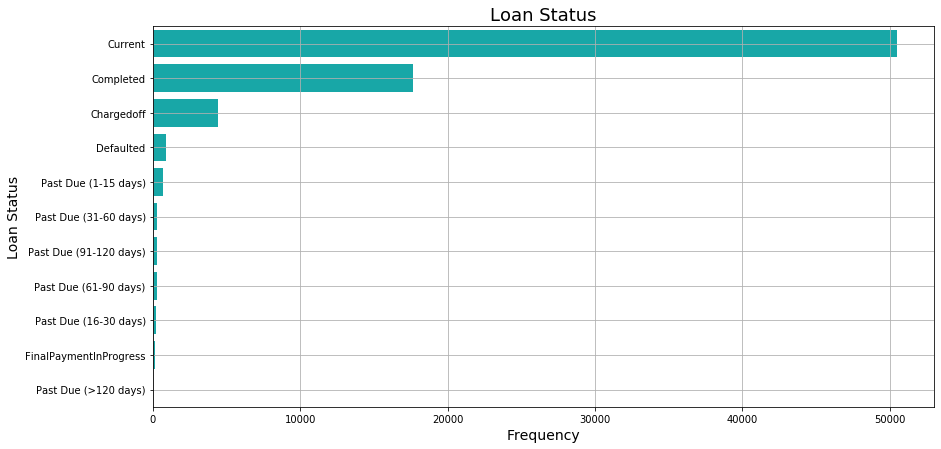

In [20]:
plt.figure(figsize=[14,7])
countstatus=cleanloan.LoanStatus.value_counts().index
sb.countplot(data=cleanloan,y='LoanStatus',order=countstatus,color='c');
plt.xlabel('Frequency', fontsize=14);
plt.ylabel('Loan Status', fontsize=14)
plt.title('Loan Status', fontsize=18)
plt.grid();


<b style=color:green>We can see most of the people have current loan status</b> 

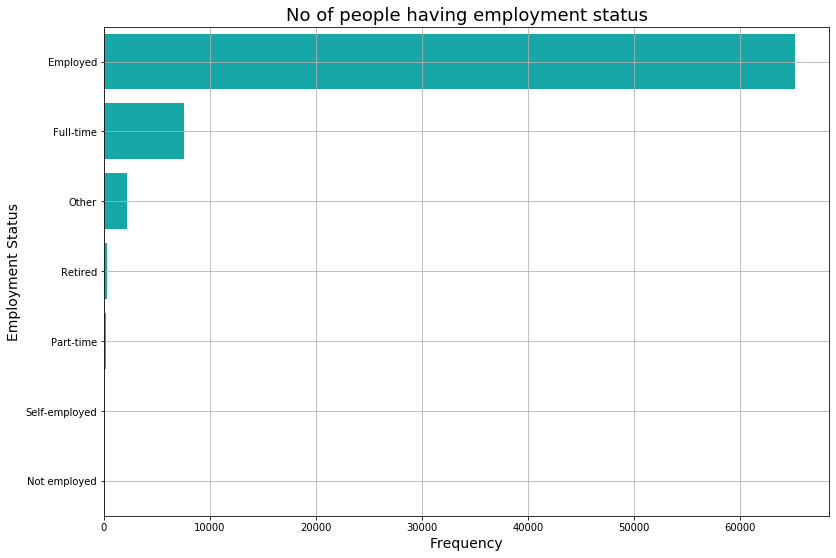

In [21]:
plt.figure(figsize=[13,9])
sorted_counts = cleanloan['EmploymentStatus'].value_counts().index
sb.countplot(data = cleanloan, y = 'EmploymentStatus', color = 'c',order=sorted_counts);
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Employment Status', fontsize=14)
plt.title('No of people having employment status', fontsize=18);
plt.grid();

<b style=color:green>Clearly we can see that most of the people are employed and there is a very less fracticion who are not employed</b> 

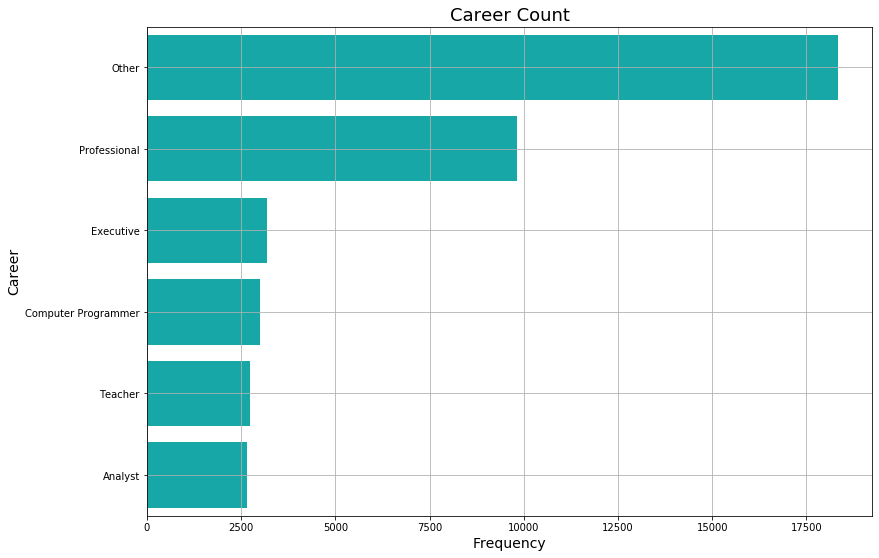

In [22]:
plt.figure(figsize=[13,9])
sorted_occu = cleanloan['Occupation'].value_counts().head(6).index
sb.countplot(data = cleanloan, y = 'Occupation', color = 'c',order=sorted_occu);
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Career', fontsize=14)
plt.title('Career Count', fontsize=18);
plt.grid();

<b style=color:green>Most of the people belong to the Other Profession</b> 

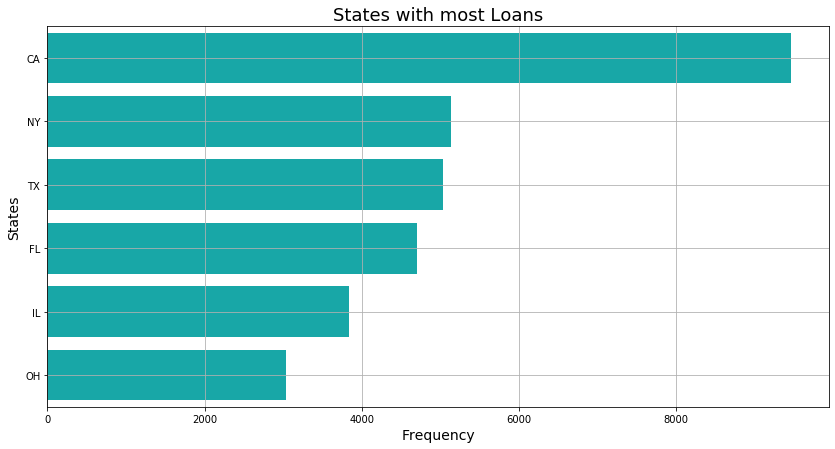

In [23]:
plt.figure(figsize=[14,7])
sorted_state = cleanloan['BorrowerState'].value_counts().head(6).index
sb.countplot(data = cleanloan, y = 'BorrowerState', color = 'c',order=sorted_state);
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('States', fontsize=14)
plt.title('States with most Loans', fontsize=18);
plt.grid();

<b style=color:green>Most of the people taking loan belong to California which is the most economic state of US, followed by New York which is the second most economic city of USA</b> 

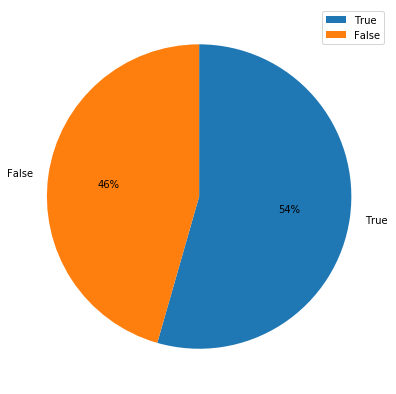

In [47]:
plt.figure(figsize=[14,7])
sorted_countshome = cleanloan['IsBorrowerHomeowner'].value_counts()
plt.pie(sorted_countshome, labels = sorted_countshome.index, startangle = 90,
        counterclock = False,autopct='%1.0f%%');
plt.legend()
plt.show()

<b style=color:green> 54% of people do have their own Home</b>

## Lets focus on finding about the people who have income less than 30000 and see what are the factors that influence the ratings

In [25]:
poor=cleanloan.query('StatedMonthlyIncome < 30000')

In [26]:
k=poor.MonthlyLoanPayment.max()

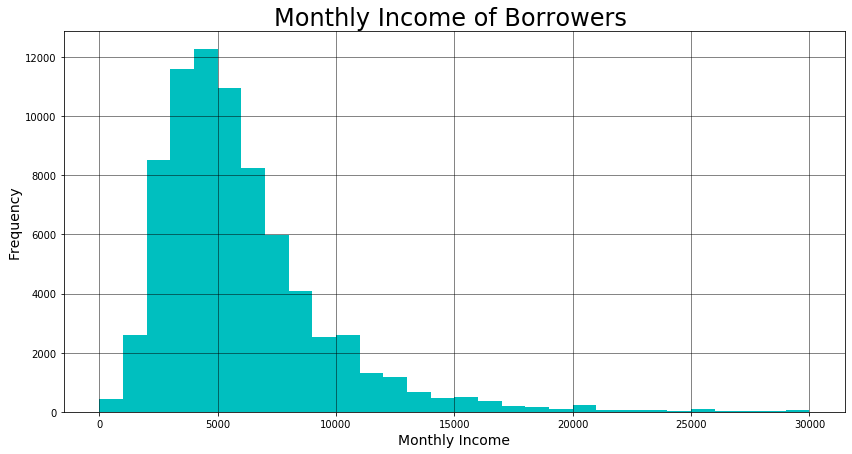

In [27]:
plt.figure(figsize=[14,7])
bins = np.arange(0, k+28000, 1000)
plt.hist(data = cleanloan, x = 'StatedMonthlyIncome', bins = bins, color='c');
plt.xlabel('Monthly Income', fontsize=14);
plt.ylabel('Frequency', fontsize=14);
plt.grid(color='black',alpha=0.6)
plt.title("Monthly Income of Borrowers ", fontsize=24);

In [28]:
poor.StatedMonthlyIncome.describe()

count    75283.000000
mean      5882.263464
std       3446.721934
min          0.250000
25%       3583.333333
50%       5000.000000
75%       7166.666667
max      29833.333333
Name: StatedMonthlyIncome, dtype: float64

<b style=color:green> We can clearly see that most of the people take loan with the income of 5882$</b>

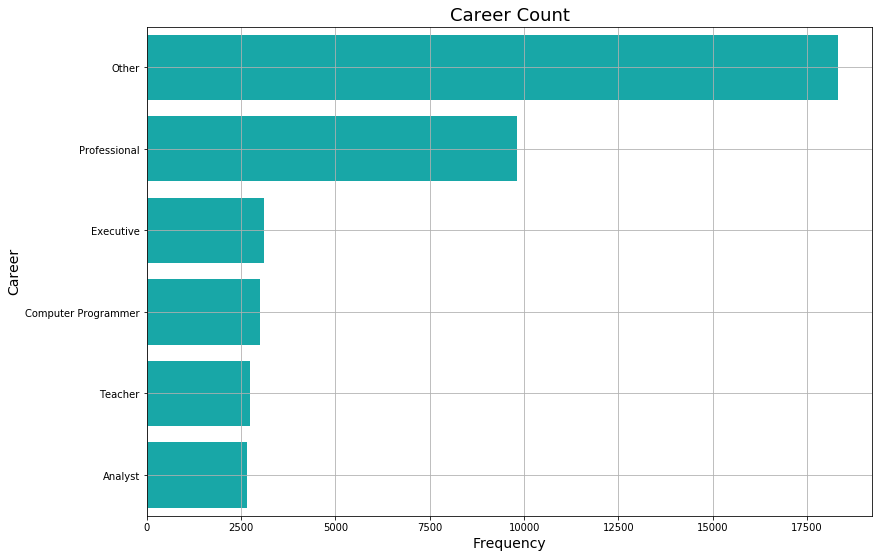

In [29]:
plt.figure(figsize=[13,9])
sorted_occu = poor['Occupation'].value_counts().head(6).index
sb.countplot(data = poor, y = 'Occupation', color = 'c',order=sorted_occu);
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Career', fontsize=14)
plt.title('Career Count', fontsize=18);
plt.grid();

<b style=color:green> Even for poor people Other and Professional are the top choices of Employment</b>

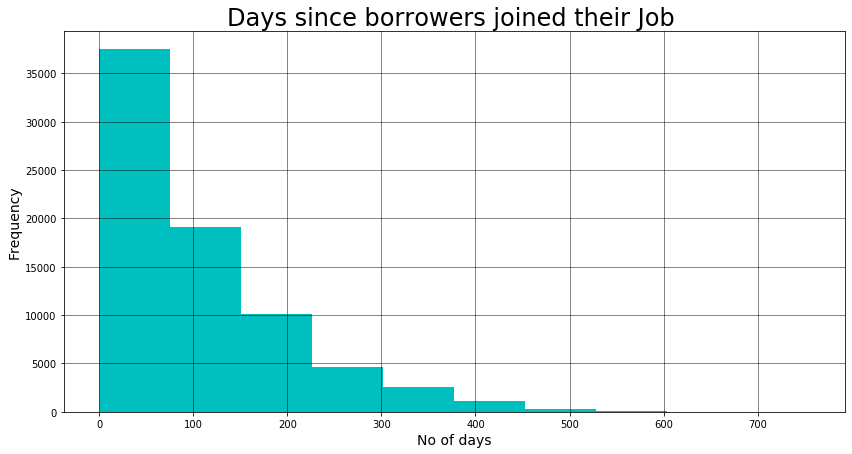

In [30]:
plt.figure(figsize=[14,7])
plt.hist(data = poor, x = 'EmploymentStatusDuration', color='c');
plt.xlabel('No of days', fontsize=14);
plt.ylabel('Frequency', fontsize=14);
plt.grid(color='black',alpha=0.6)
plt.title("Days since borrowers joined their Job ", fontsize=24);

<b style=color:green> We can see that most of the people are under 100 days of their jobs</b>

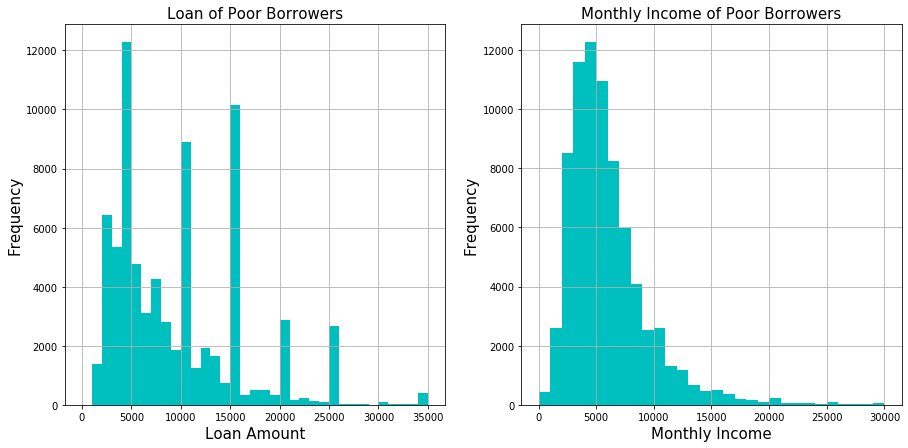

In [31]:
plt.figure(figsize=[15,7])
plt.subplot(1, 2, 1)
ok=poor.LoanOriginalAmount.max()
bins=np.arange(0,ok+1000,1000)
plt.hist(data =poor, x = 'LoanOriginalAmount',bins=bins,color='c')
plt.xlabel('Loan Amount',fontsize=15)
plt.ylabel('Frequency',fontsize=15);
plt.title("Loan of Poor Borrowers",fontsize=15);
plt.grid()
plt.subplot(1, 2, 2)
bins = np.arange(0, k+28000, 1000)
plt.hist(data = cleanloan, x = 'StatedMonthlyIncome', bins = bins,color='c');
plt.xlabel('Monthly Income',fontsize=15);
plt.ylabel('Frequency',fontsize=15);
plt.title("Monthly Income of Poor Borrowers", fontsize=15);
plt.grid()

<b style=color:green> We can see that most of the people are taking loan in the range of 5000 just like the average of monthly income, but one thing to notice here is that people having 15,000 as a salary is less but still many are taking loan for that much big amount</b>

In [32]:
c=poor['ListingCategory (numeric)']
c=c.value_counts()
c

1     47918
7      8228
2      6249
3      3607
6      2027
13     1758
15     1368
14      783
18      770
20      718
19      706
16      288
5       201
11      198
8       187
9        83
10       82
17       49
12       44
0        19
Name: ListingCategory (numeric), dtype: int64

## Insights

> 1. Most of the Poor people are taking Loans for Debt Consodilation, Home Improvemnt, Business and Household Expenses.
> 2. The states with highest Loans are California which is the economic Hub of US and then New York.
> 3. Mostly People with recent joinings upto 100 Days are taking Loans.
> 4. 46% of the people dont have their home.
> 5. There is a strange pattern to be noticed that is the average people taking loans has salary 5000 dollars, yet people are taking loans of 25000 with a high spike
> 6. The top choice for employment even is Others or Professional Career.
> 7. Most of them are currently on Loan

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. 

In [33]:
poor.IncomeRange.value_counts()

$50,000-74,999    23432
$25,000-49,999    21219
$100,000+         13646
$75,000-99,999    13427
$1-24,999          3558
Not employed          1
Name: IncomeRange, dtype: int64

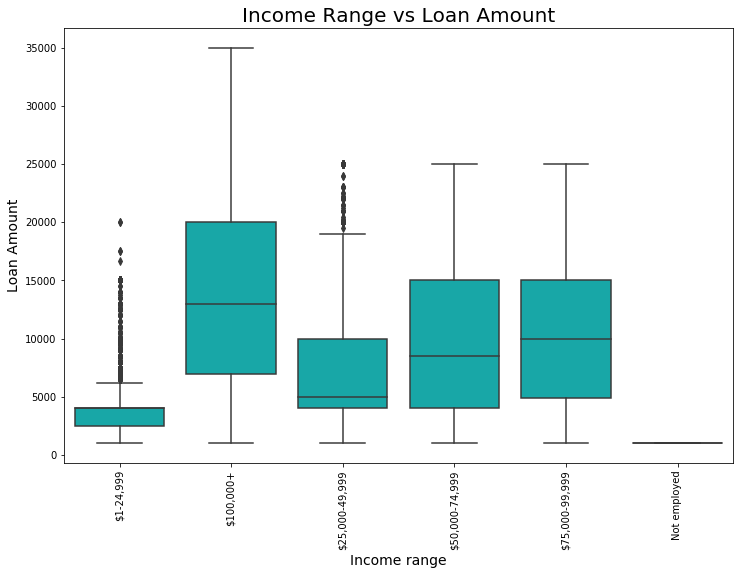

In [34]:
plt.figure(figsize=[12,8])
sb.boxplot(data = poor, x = 'IncomeRange', y = 'LoanOriginalAmount', color = 'c')
plt.xticks(rotation = 90);
plt.ylabel('Loan Amount', fontsize=14)
plt.xlabel('Income range', fontsize=14)
plt.title('Income Range vs Loan Amount', fontsize=20);

<b style=color:green> We can clearly see that the people with income higher than 100,000+ take the highest amount of Loan</b>

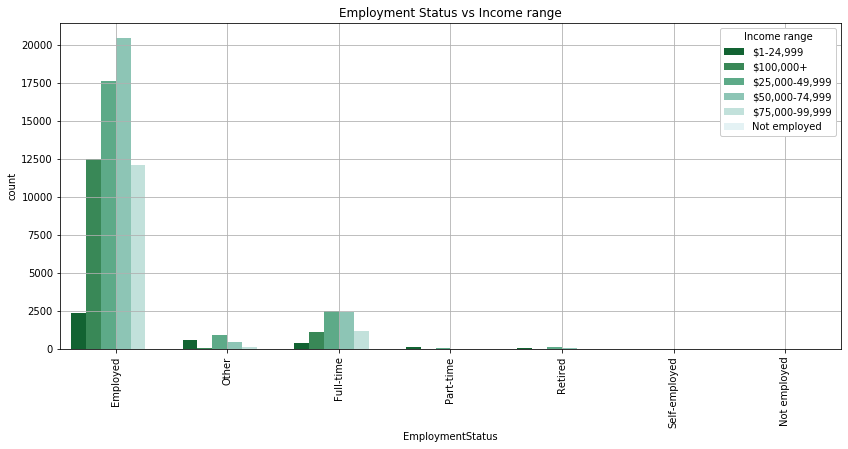

In [35]:
plt.figure(figsize=[14,6])
sb.countplot(data = poor, x = 'EmploymentStatus', hue = 'IncomeRange', palette = 'BuGn_r')
plt.legend(loc = 1, ncol = 1, framealpha = 1, title = 'Income range')
plt.xticks(rotation = 90)
plt.grid()
plt.title('Employment Status vs Income range');


<b style=color:green> Most of the people who are employed with range of 50-75 are highest</b>

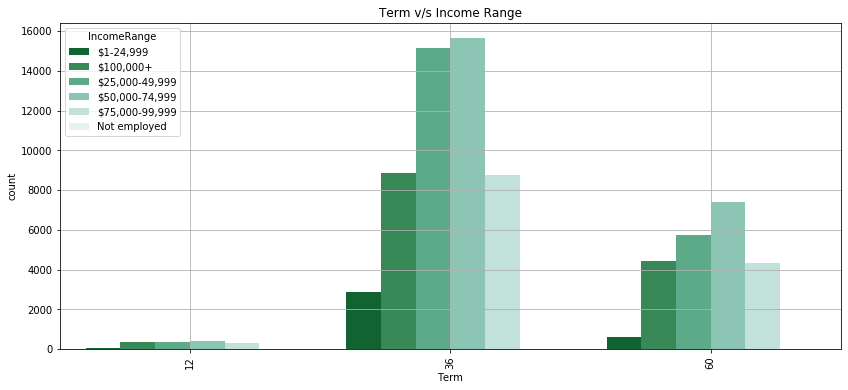

In [36]:
plt.figure(figsize=[14,6])
sb.countplot(data = poor, x = 'Term', hue = 'IncomeRange', palette = 'BuGn_r')
plt.xticks(rotation = 90)
plt.grid()
plt.title('Term v/s Income Range');

<b style=color:green> Most of the people are in the term 36, with 50-75 range</b>

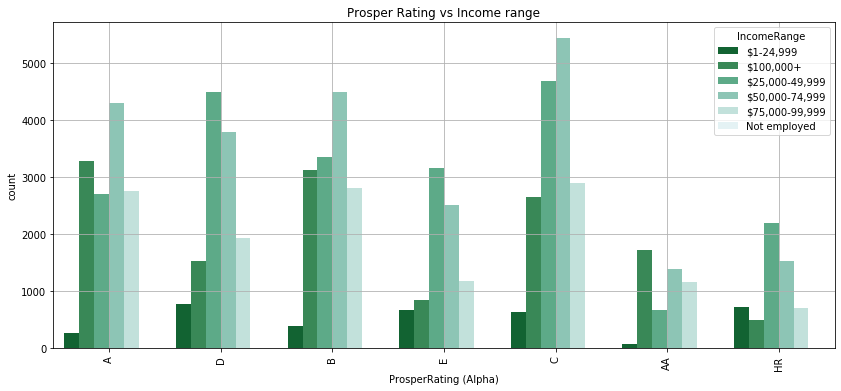

In [37]:
plt.figure(figsize=[14,6])
sb.countplot(data = poor, x ='ProsperRating (Alpha)' , hue = 'IncomeRange', palette = 'BuGn_r')
plt.xticks(rotation = 90)
plt.grid()
plt.title('Prosper Rating vs Income range');

<b style=color:green> Minimum are from the rating AA</b>

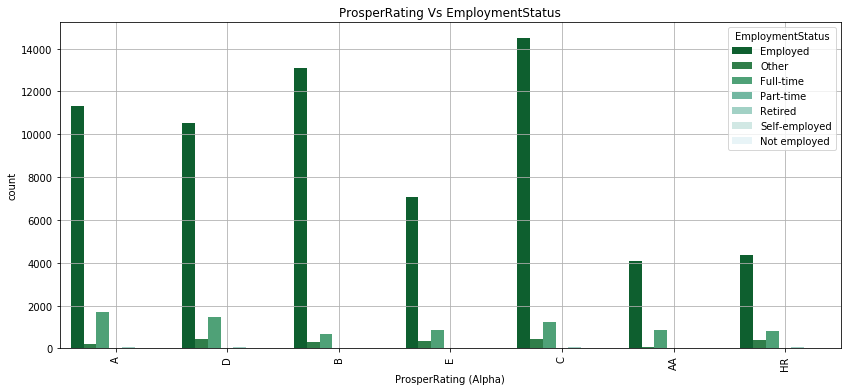

In [38]:
plt.figure(figsize=[14,6])
sb.countplot(data = poor, x ='ProsperRating (Alpha)' , hue = 'EmploymentStatus', palette = 'BuGn_r')
plt.xticks(rotation = 90)
plt.grid()
plt.title('ProsperRating Vs EmploymentStatus');

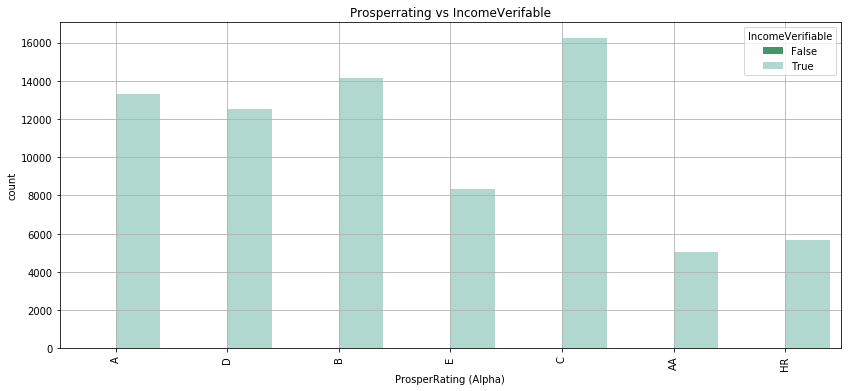

In [39]:
plt.figure(figsize=[14,6])
sb.countplot(data = poor, x ='ProsperRating (Alpha)' , hue = 'IncomeVerifiable', palette = 'BuGn_r')
plt.xticks(rotation = 90)
plt.grid()
plt.title('Prosperrating vs IncomeVerifable');

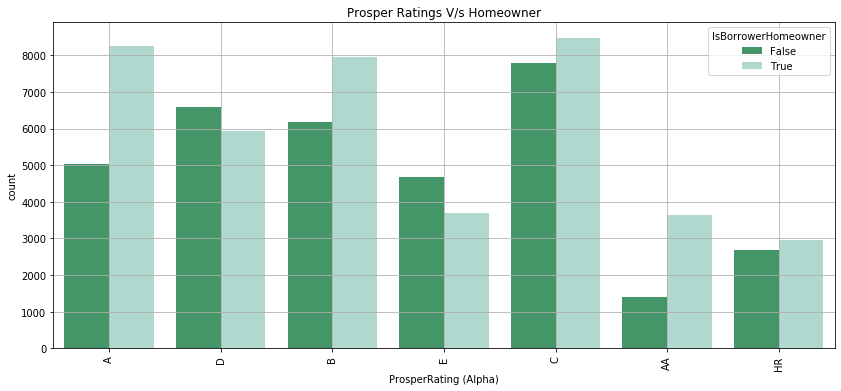

In [40]:
plt.figure(figsize=[14,6])
sb.countplot(data = poor, x ='ProsperRating (Alpha)' , hue = 'IsBorrowerHomeowner', palette = 'BuGn_r')
plt.xticks(rotation = 90)
plt.grid()
plt.title('Prosper Ratings V/s Homeowner');

<b style=color:green> Majority of the D and E dont have any Home</b>

## Insights

> 1.LoanOriginalAmount is highest for A and B Prosper ratings, when compared with income range.
> 2. Majority are from the range 100+.
> 3. AA rating having more people not owning home compared to HR which is very strage.
> 4. Majority of the people are employed

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
 I saw that most of the borrowers with highest loan amount are taken by Employed, this is followed by others and fulltime employees and mostly it decides the rating of one.
### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
Even people with 100,000+ income are in HR list which are employed and have a home

## Multivariate Exploration


### Does Loan Status Depends on Income?

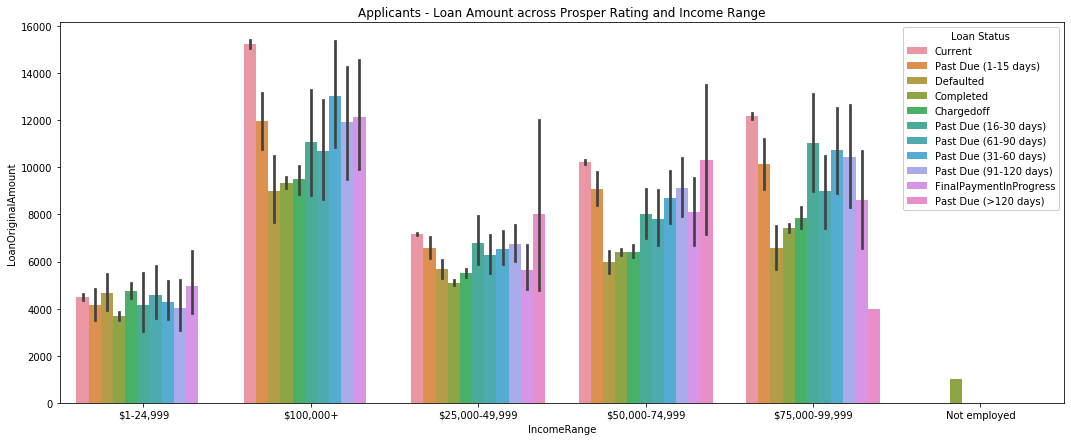

In [46]:
plt.figure(figsize = [18, 7])
ax = sb.barplot(data = poor, x = 'IncomeRange', y = 'LoanOriginalAmount', hue = 'LoanStatus')
ax.legend(loc = 1, ncol = 1, framealpha = 1, title = 'Loan Status')
plt.title('Applicants - Loan Amount across Prosper Rating and Income Range');
plt.show()

<b style=color:green> Yes, clearly people with more income are having more people in current status</b>

### Does Salary decides the Ratings?

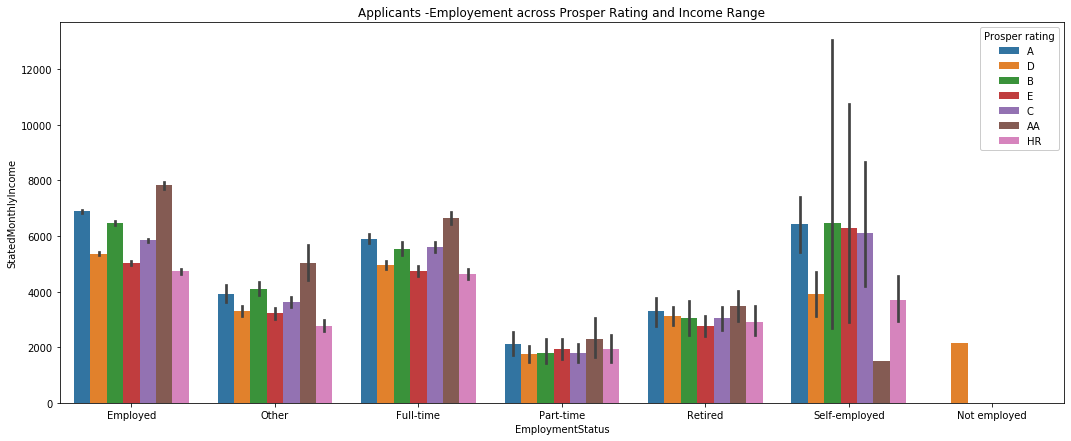

In [42]:
plt.figure(figsize = [18, 7])
ax = sb.barplot(data = poor, x = 'EmploymentStatus', y = 'StatedMonthlyIncome', hue = 'ProsperRating (Alpha)')
ax.legend(loc = 1, ncol = 1, framealpha = 1, title = 'Prosper rating')
plt.title('Applicants -Employement across Prosper Rating and Income Range');

<b style=color:green>Yes, but for Employed, Other and Full Time Employees, but not for others</b>

## Does APR varies with One having home and Prosper Rating?


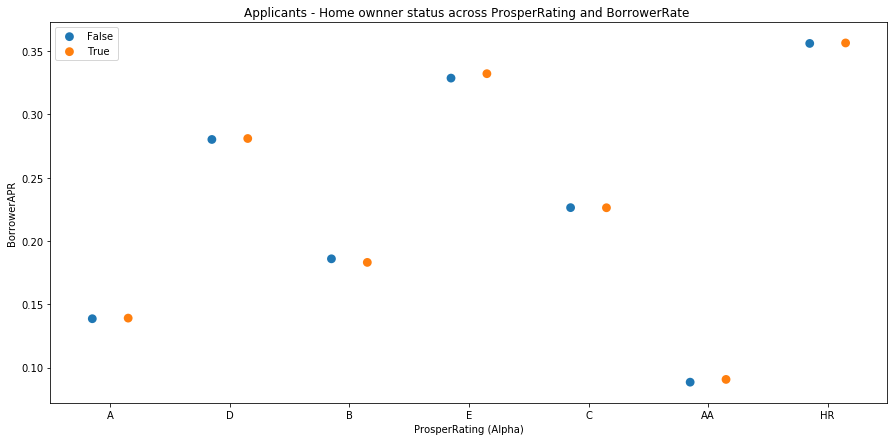

In [45]:
plt.figure(figsize = [15, 7])
ax = sb.pointplot(data = poor, x = 'ProsperRating (Alpha)', y = 'BorrowerAPR', hue = 'IsBorrowerHomeowner',
                  dodge = 0.3, linestyles = "");
plt.title('Applicants - Home ownner status across ProsperRating and BorrowerRate ');
plt.legend()
plt.show()

<b style=color:green> Yes, AA has lowest APR while HR has the highest. One thing to notice that in Having a home doesnt impact rating that much</b>

## Conclusion

1. Most of the poor borrowers fall in prosper rating of B , irrespective of the income range

2. The monthly income of borrowers are having higher values for employed, other and full time employment status with the prosper rating of AA, A and B.

3. Having a home doesnt effect the interest.
To conclude the analysis , I say that the loan approval status is dependent on the Income, Homeownerstatus and employment status.